In [1]:
# Для хранения данных
import pandas as pd

# Для системных нужд
import datetime
import os

# Для построения сетевого взаимодействия
from urllib.request import urlopen
from urllib.error import HTTPError

In [2]:
# Создаем результирующий DataFrame
df = pd.DataFrame(columns=["Код инструмента", "Календарная дата", "Цена"])

# Фиксируем интересующий нас код
code = "A592UFM060F"

print('--- Начало ---')

''' Загрузка данных за период от 26.07.2013 до сегодняшнего дня.
 Для более ранних дат суффикс имени excel файлов имеет переменное значение.
 Исходя из предварительного анализа было определено, что код A592UFM060F начинает встречаться с 2015 года,
 поэтому скрипт не предназначен для работы с более ранними датами
'''

start_date = datetime.datetime(2013, 7, 26)
end_date = datetime.datetime.today()

current_date = start_date
while current_date <= end_date:
    # Создаем шаблон для xls-файлов
    filename = 'oil_xls_' + current_date.strftime('%Y%m%d') + '162000.xls'
    url = 'http://spimex.com/upload/reports/oil_xls/' + filename

    # Пробуем скачивать данные по URL
    body = ''
    try:
        body = urlopen(url).read()
    except HTTPError:
        pass

    # Обрабатываем данные в случае удачного скачивания
    if body:
        # Берем из excel колонки с кодом инструмента (B) и рыночной ценой (L) и создаем текущий DataFrame
        df_current = pd.read_excel(body, header=7, usecols='B, L', names=["Код", "Цена"], index=False)
        
        # Извлекаем цену для A592UFM060F
        df_current_price = df_current[df_current['Код']==code]["Цена"]
        
        # Проверяем, что есть хотя бы одна запись для нашего кода инструмента
        if not df_current_price.empty and df_current_price.values[0] != "-":
            price = int(df_current_price.values[0])
            df = df.append({"Код инструмента": code, 
                            "Цена": price, 
                            "Календарная дата": str(current_date.strftime('%d/%m/%Y'))
                           }, 
                           ignore_index=True
                          )
            print("%s" % current_date.strftime('%d/%m/%Y'))
        else:
            print("(Код отсутствует) %s" % current_date.strftime('%d/%m/%Y'))
    else:
        print("(Выходной) %s" % current_date.strftime('%d/%m/%Y'))

    # Переход к следующей дате
    current_date = current_date + datetime.timedelta(days=1)

print('--- Конец ---')

--- Начало ---
(Код отсутствует) 26/07/2013
(Выходной) 27/07/2013
(Выходной) 28/07/2013
(Код отсутствует) 29/07/2013
(Код отсутствует) 30/07/2013
(Код отсутствует) 31/07/2013
(Код отсутствует) 01/08/2013
(Код отсутствует) 02/08/2013
(Выходной) 03/08/2013
(Выходной) 04/08/2013
(Код отсутствует) 05/08/2013
(Код отсутствует) 06/08/2013
(Код отсутствует) 07/08/2013
(Код отсутствует) 08/08/2013
(Код отсутствует) 09/08/2013
(Выходной) 10/08/2013
(Выходной) 11/08/2013
(Код отсутствует) 12/08/2013
(Код отсутствует) 13/08/2013
(Код отсутствует) 14/08/2013
(Код отсутствует) 15/08/2013
(Код отсутствует) 16/08/2013
(Выходной) 17/08/2013
(Выходной) 18/08/2013
(Код отсутствует) 19/08/2013
(Код отсутствует) 20/08/2013
(Код отсутствует) 21/08/2013
(Код отсутствует) 22/08/2013
(Код отсутствует) 23/08/2013
(Выходной) 24/08/2013
(Выходной) 25/08/2013
(Код отсутствует) 26/08/2013
(Код отсутствует) 27/08/2013
(Код отсутствует) 28/08/2013
(Код отсутствует) 29/08/2013
(Код отсутствует) 30/08/2013
(Выходной) 

(Код отсутствует) 29/05/2014
(Код отсутствует) 30/05/2014
(Выходной) 31/05/2014
(Выходной) 01/06/2014
(Код отсутствует) 02/06/2014
(Код отсутствует) 03/06/2014
(Код отсутствует) 04/06/2014
(Код отсутствует) 05/06/2014
(Код отсутствует) 06/06/2014
(Выходной) 07/06/2014
(Выходной) 08/06/2014
(Код отсутствует) 09/06/2014
(Код отсутствует) 10/06/2014
(Код отсутствует) 11/06/2014
(Выходной) 12/06/2014
(Выходной) 13/06/2014
(Выходной) 14/06/2014
(Выходной) 15/06/2014
(Код отсутствует) 16/06/2014
(Код отсутствует) 17/06/2014
(Код отсутствует) 18/06/2014
(Код отсутствует) 19/06/2014
(Код отсутствует) 20/06/2014
(Выходной) 21/06/2014
(Выходной) 22/06/2014
(Код отсутствует) 23/06/2014
(Код отсутствует) 24/06/2014
(Код отсутствует) 25/06/2014
(Код отсутствует) 26/06/2014
(Код отсутствует) 27/06/2014
(Выходной) 28/06/2014
(Выходной) 29/06/2014
(Код отсутствует) 30/06/2014
(Код отсутствует) 01/07/2014
(Код отсутствует) 02/07/2014
(Код отсутствует) 03/07/2014
(Код отсутствует) 04/07/2014
(Выходной) 

14/04/2015
(Код отсутствует) 15/04/2015
(Код отсутствует) 16/04/2015
(Код отсутствует) 17/04/2015
(Выходной) 18/04/2015
(Выходной) 19/04/2015
20/04/2015
21/04/2015
22/04/2015
23/04/2015
24/04/2015
(Выходной) 25/04/2015
(Выходной) 26/04/2015
(Код отсутствует) 27/04/2015
(Код отсутствует) 28/04/2015
29/04/2015
(Код отсутствует) 30/04/2015
(Выходной) 01/05/2015
(Выходной) 02/05/2015
(Выходной) 03/05/2015
(Выходной) 04/05/2015
(Код отсутствует) 05/05/2015
(Код отсутствует) 06/05/2015
07/05/2015
08/05/2015
(Выходной) 09/05/2015
(Выходной) 10/05/2015
(Выходной) 11/05/2015
12/05/2015
13/05/2015
14/05/2015
15/05/2015
(Выходной) 16/05/2015
(Выходной) 17/05/2015
18/05/2015
19/05/2015
20/05/2015
21/05/2015
22/05/2015
(Выходной) 23/05/2015
(Выходной) 24/05/2015
25/05/2015
26/05/2015
27/05/2015
28/05/2015
29/05/2015
(Выходной) 30/05/2015
(Выходной) 31/05/2015
01/06/2015
02/06/2015
03/06/2015
04/06/2015
05/06/2015
(Выходной) 06/06/2015
(Выходной) 07/06/2015
08/06/2015
09/06/2015
10/06/2015
11/06/201

17/10/2016
18/10/2016
19/10/2016
20/10/2016
21/10/2016
(Выходной) 22/10/2016
(Выходной) 23/10/2016
24/10/2016
25/10/2016
26/10/2016
27/10/2016
28/10/2016
(Выходной) 29/10/2016
(Выходной) 30/10/2016
31/10/2016
01/11/2016
02/11/2016
03/11/2016
(Выходной) 04/11/2016
(Выходной) 05/11/2016
(Выходной) 06/11/2016
07/11/2016
08/11/2016
09/11/2016
10/11/2016
11/11/2016
(Выходной) 12/11/2016
(Выходной) 13/11/2016
14/11/2016
15/11/2016
16/11/2016
17/11/2016
18/11/2016
(Выходной) 19/11/2016
(Выходной) 20/11/2016
21/11/2016
22/11/2016
23/11/2016
24/11/2016
25/11/2016
(Выходной) 26/11/2016
(Выходной) 27/11/2016
28/11/2016
29/11/2016
30/11/2016
01/12/2016
02/12/2016
(Выходной) 03/12/2016
(Выходной) 04/12/2016
05/12/2016
06/12/2016
07/12/2016
08/12/2016
09/12/2016
(Выходной) 10/12/2016
(Выходной) 11/12/2016
12/12/2016
13/12/2016
14/12/2016
15/12/2016
16/12/2016
(Выходной) 17/12/2016
(Выходной) 18/12/2016
19/12/2016
20/12/2016
21/12/2016
22/12/2016
23/12/2016
(Выходной) 24/12/2016
(Выходной) 25/12/2016

26/04/2018
27/04/2018
28/04/2018
(Выходной) 29/04/2018
(Выходной) 30/04/2018
(Выходной) 01/05/2018
(Выходной) 02/05/2018
03/05/2018
04/05/2018
(Выходной) 05/05/2018
(Выходной) 06/05/2018
07/05/2018
08/05/2018
(Выходной) 09/05/2018
10/05/2018
11/05/2018
(Выходной) 12/05/2018
(Выходной) 13/05/2018
14/05/2018
15/05/2018
16/05/2018
17/05/2018
18/05/2018
(Выходной) 19/05/2018
(Выходной) 20/05/2018
21/05/2018
22/05/2018
23/05/2018
24/05/2018
25/05/2018
(Выходной) 26/05/2018
(Выходной) 27/05/2018
28/05/2018
29/05/2018
30/05/2018
31/05/2018
01/06/2018
(Выходной) 02/06/2018
(Выходной) 03/06/2018
04/06/2018
05/06/2018
06/06/2018
07/06/2018
08/06/2018
09/06/2018
(Выходной) 10/06/2018
(Выходной) 11/06/2018
(Выходной) 12/06/2018
13/06/2018
14/06/2018
15/06/2018
(Выходной) 16/06/2018
(Выходной) 17/06/2018
18/06/2018
19/06/2018
20/06/2018
21/06/2018
22/06/2018
(Выходной) 23/06/2018
(Выходной) 24/06/2018
25/06/2018
26/06/2018
27/06/2018
28/06/2018
29/06/2018
(Выходной) 30/06/2018
(Выходной) 01/07/2018

(Выходной) 04/11/2019
05/11/2019
06/11/2019
07/11/2019
08/11/2019
(Выходной) 09/11/2019
(Выходной) 10/11/2019
11/11/2019
12/11/2019
13/11/2019
14/11/2019
15/11/2019
(Выходной) 16/11/2019
(Выходной) 17/11/2019
18/11/2019
19/11/2019
20/11/2019
21/11/2019
22/11/2019
(Выходной) 23/11/2019
(Выходной) 24/11/2019
25/11/2019
26/11/2019
27/11/2019
28/11/2019
29/11/2019
(Выходной) 30/11/2019
(Выходной) 01/12/2019
02/12/2019
03/12/2019
04/12/2019
05/12/2019
06/12/2019
(Выходной) 07/12/2019
(Выходной) 08/12/2019
09/12/2019
10/12/2019
11/12/2019
12/12/2019
13/12/2019
(Выходной) 14/12/2019
(Выходной) 15/12/2019
16/12/2019
17/12/2019
18/12/2019
19/12/2019
20/12/2019
(Выходной) 21/12/2019
(Выходной) 22/12/2019
23/12/2019
24/12/2019
(Выходной) 25/12/2019
(Выходной) 26/12/2019
(Выходной) 27/12/2019
(Выходной) 28/12/2019
(Выходной) 29/12/2019
(Выходной) 30/12/2019
(Выходной) 31/12/2019
(Выходной) 01/01/2020
(Выходной) 02/01/2020
(Выходной) 03/01/2020
(Выходной) 04/01/2020
(Выходной) 05/01/2020
(Выходной)

(Выходной) 09/05/2021
(Выходной) 10/05/2021
11/05/2021
12/05/2021
13/05/2021
14/05/2021
(Выходной) 15/05/2021
(Выходной) 16/05/2021
17/05/2021
18/05/2021
19/05/2021
20/05/2021
21/05/2021
(Выходной) 22/05/2021
(Выходной) 23/05/2021
24/05/2021
25/05/2021
26/05/2021
27/05/2021
28/05/2021
(Выходной) 29/05/2021
(Выходной) 30/05/2021
31/05/2021
01/06/2021
02/06/2021
03/06/2021
04/06/2021
(Выходной) 05/06/2021
(Выходной) 06/06/2021
07/06/2021
08/06/2021
09/06/2021
10/06/2021
11/06/2021
(Выходной) 12/06/2021
(Выходной) 13/06/2021
(Выходной) 14/06/2021
15/06/2021
16/06/2021
17/06/2021
18/06/2021
(Выходной) 19/06/2021
(Выходной) 20/06/2021
21/06/2021
22/06/2021
23/06/2021
24/06/2021
25/06/2021
(Выходной) 26/06/2021
(Выходной) 27/06/2021
28/06/2021
29/06/2021
30/06/2021
01/07/2021
02/07/2021
(Выходной) 03/07/2021
(Выходной) 04/07/2021
05/07/2021
06/07/2021
07/07/2021
08/07/2021
09/07/2021
(Выходной) 10/07/2021
(Выходной) 11/07/2021
12/07/2021
13/07/2021
14/07/2021
15/07/2021
16/07/2021
(Выходной)

In [3]:
df

,Код инструмента,Календарная дата,Цена
0,A592UFM060F,27/02/2015,32100
1,A592UFM060F,04/03/2015,33300
2,A592UFM060F,17/03/2015,32650
3,A592UFM060F,18/03/2015,32000
4,A592UFM060F,19/03/2015,31800
...,...,...,...
1818,A592UFM060F,26/09/2022,39462
1819,A592UFM060F,27/09/2022,38500
1820,A592UFM060F,28/09/2022,37913
1821,A592UFM060F,29/09/2022,38064


In [4]:
df.to_csv('output.csv')  

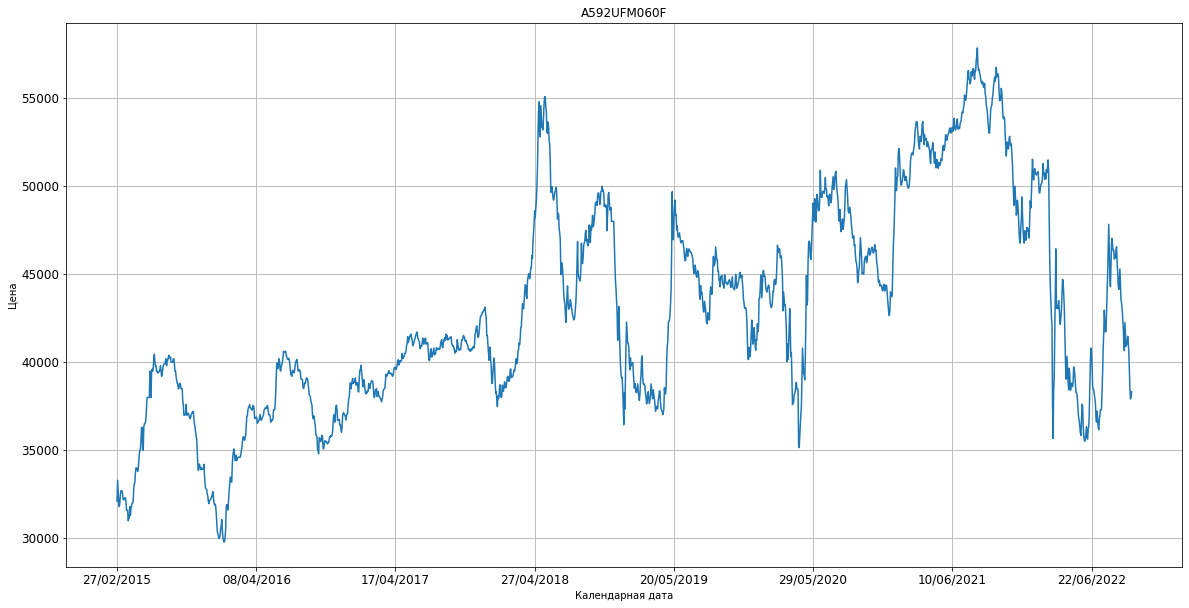

In [5]:
ax = df.plot(x="Календарная дата", grid=True, legend=False, figsize=(20,10), title=code, fontsize=12)
ax.set_xlabel("Календарная дата")
ax.set_ylabel("Цена");

In [7]:
fig = ax.get_figure()
fig.savefig('price_plot.png')